In [1]:
# 라이브러리 호출
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
# MAT 파일 불러오기
mat_path = r"../HW3_package/hw3_prob2.mat"
mat_data = scipy.io.loadmat(mat_path)


f = mat_data['f']
x_orig = mat_data['x_orig']

In [3]:
def Dh(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[:, 1:cols] = u[:, 1:cols] - u[:, 0:cols-1]
    d[:, 0] = u[:, 0] - u[:, cols-1]
    return d

def Dht(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[:, 0:cols-1] = u[:, 0:cols-1] - u[:, 1:cols]
    d[:, cols-1] = u[:, cols-1] - u[:, 0]
    return d

def Dv(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[1:rows, :] = u[1:rows, :] - u[0:rows-1, :]
    d[0, :] = u[0, :] - u[rows-1, :]
    return d

def Dvt(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[0:rows-1, :] = u[0:rows-1, :] - u[1:rows, :]
    d[rows-1, :] = u[rows-1, :] - u[0, :]
    return d

In [59]:
# 1로 초기화 
wh = np.ones(f.shape)
wv = np.ones(f.shape)

x = np.zeros(f.shape)

mu = 0.02
lmbd = 0.0002 

stopping_point = 1e-4
result = []


    
for idx in range(2):
    
    # w를 1로 초기화 해주어야 하기 때문에 idx가 1일 때부터 w의 값을 조정해준다. 
    if idx > 0:
        # mu, sigma, lambda 찾기 
        sigma = 200
        mu = 0.0001
        lmbd = 1
        
        
        wh = 1 / (np.abs(Dh(x) + qh) + sigma)
        wv = 1 / (np.abs(Dv(x) + qv) + sigma) 
        x = np.zeros(f.shape)
      
        

    dh = np.zeros(f.shape)
    dv = np.zeros(f.shape)
    qh = np.zeros(f.shape)
    qv = np.zeros(f.shape)
    
    for iter in range(100000):
        x_minus1 = x
        
        # minimize x
        x = (mu * f) + (lmbd* ((wv ** 2) * np.roll(x, 1, axis = 0) +((wv** 2) * np.roll(x, -1, axis = 0)) + ((wh** 2) * np.roll(x, 1, axis = 1)) + ((wh ** 2) * np.roll(x, -1, axis = 1)) + (wh * Dht(dh - qh)) +( wv * Dvt(dv - qv))))
        x = x / (mu + 2 * lmbd * (wh ** 2)) + (2 * lmbd * (wv ** 2)) 
        
        # minimize dv, dh
        dh =  np.sign(wh * Dh(x) + qh) * np.maximum(np.abs(wh * Dh(x) + qh) - (1 / lmbd), 0)
        dv =  np.sign(wv * Dv(x) + qv) * np.maximum(np.abs(wv * Dv(x) + qv) - (1 / lmbd), 0)
        
        # minimize qv, qh 
        qh = qh + (wh * Dh(x) - dh)
        qv = qv + (wv * Dv(x) - dv)
        
        print(iter)
        # break check
        if  (np.linalg.norm((x - x_minus1), 2) / np.linalg.norm(x, 2)) < stopping_point and iter > 10:
            break    
            
    result.append(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46


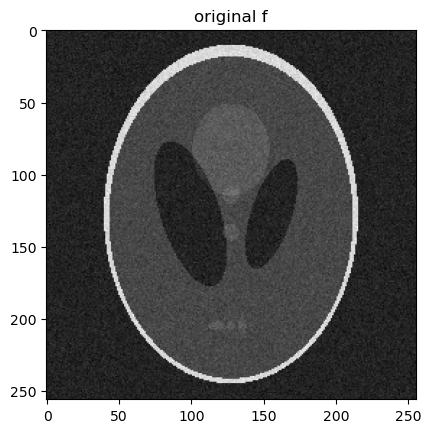

In [60]:
# original f 
plt.imshow(f, cmap = "gray")
plt.title( label = "original f")
plt.show()

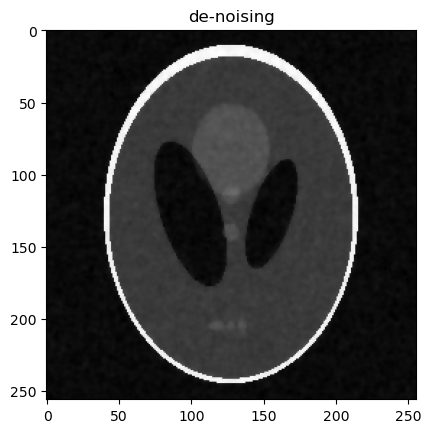

In [61]:
# original f 
plt.imshow(result[0], cmap = "gray")
plt.title( label = "de-noising")
plt.show()

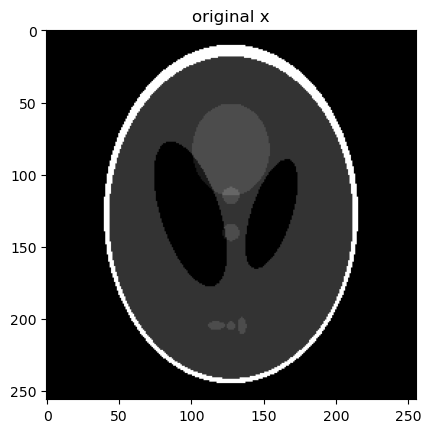

In [62]:
# original x 
plt.imshow(x_orig, cmap = "gray")
plt.title( label = "original x")
plt.show()

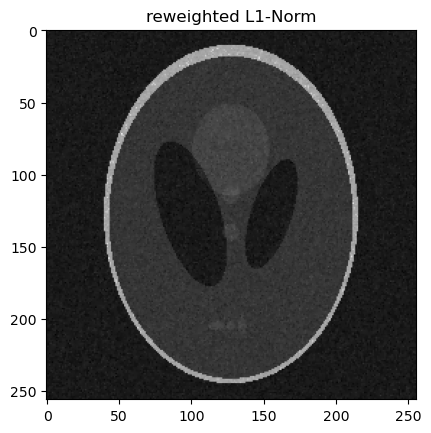

In [63]:
# original f 
plt.imshow(result[1], cmap = "gray")
plt.title( label = "reweighted L1-Norm")
plt.show()